In [ ]:
!curl https://www.ageguess.org/download/data --output ageguess-data-public-csv-20190530--.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 3311k  100 3311k    0     0  2205k      0  0:00:01  0:00:01 --:--:-- 2203k


In [ ]:
! ls

n
 ageguess-data-public-csv-20190530--.zip   __MACOSX
'AgeGuessDataUKDataService I'		   sample_data


In [ ]:
!unzip ageguess-data-public-csv-20190530--.zip

Archive:  ageguess-data-public-csv-20190530--.zip
replace AgeGuessDataUKDataService I/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace __MACOSX/AgeGuessDataUKDataService I/._.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace AgeGuessDataUKDataService I/ag_gamers.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: no
replace __MACOSX/AgeGuessDataUKDataService I/._ag_gamers.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace AgeGuessDataUKDataService I/ag_guess.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace __MACOSX/AgeGuessDataUKDataService I/._ag_guess.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace AgeGuessDataUKDataService I/ag_photos.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace __MACOSX/AgeGuessDataUKDataService I/._ag_photos.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace AgeGuessDataUKDataService I/ag_quality.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace __MACOSX/AgeGuessDataUKDataService I/._ag_quality.csv? [y]es, [n]o, [A]ll, [N]one, [r]e

In [ ]:
import numpy as np 
import pandas as pd 
from sklearn import preprocessing
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
ag_guess_df = pd.read_csv(r'AgeGuessDataUKDataService I/ag_guess.csv')
print (ag_guess_df)

         uid  photo_id  guess_id  ageG  outG               access
0          6       243        10    28     2  2012-05-30 03:10:00
1          5       243        12    26     0  2012-05-30 03:10:00
2          3       243        37    25    -1  2012-05-30 03:40:00
3          8       243        50    23    -3  2012-05-30 04:07:00
4          9       243        67    28     2  2012-05-30 04:23:00
...      ...       ...       ...   ...   ...                  ...
220382  4432    255075    254911    24    -4  2019-03-22 15:35:14
220383  3422    255075    254990    26    -2  2019-03-23 16:43:57
220384  4376    255075    255066    22    -6  2019-03-25 05:58:55
220385  4427    255075    255085    21    -7  2019-03-25 22:30:51
220386  4434    255075    255112    19    -9  2019-03-26 18:23:35

[220387 rows x 6 columns]


In [ ]:
ag_guess_df.head()

,uid,photo_id,guess_id,ageG,outG,access
0,6,243,10,28,2,2012-05-30 03:10:00
1,5,243,12,26,0,2012-05-30 03:10:00
2,3,243,37,25,-1,2012-05-30 03:40:00
3,8,243,50,23,-3,2012-05-30 04:07:00
4,9,243,67,28,2,2012-05-30 04:23:00


### ag_guess.csv

The ag_guess.csv file stores the information regarding the age guesses using the following variables: uid, guess_id, photo_id, ageG, outG, and access. The uid, guess_id, and photo_id variables contain the individual identifiers of the user who made the guess, the guess itself, and the photograph guessed on. The ageG and outG variables describe the guessed age and the deviation in the guess from the real age in years, respectively. The access variables store the timestamp when the guess was made in date and time UTC + 1:00 in the format ‘YYYY-MM-DD HH:MM:SS’. While repeated guessing by the same person on the same photograph is no longer possible due to the current version of the algorithm controlling the photos displayed to the users, this was possible in early implementations of AgeGuess. Data on repeated guesses are available from previous versions of the database upon request.

In [ ]:
ag_guess_df.shape

(220387, 6)

In [ ]:
ag_guess_df = ag_guess_df.drop_duplicates(['uid', 'photo_id'])

In [ ]:
ag_guess_df.shape

(220387, 6)

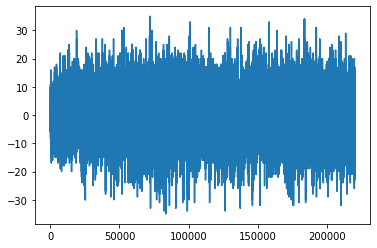

In [ ]:
plt.plot(ag_guess_df['outG'])

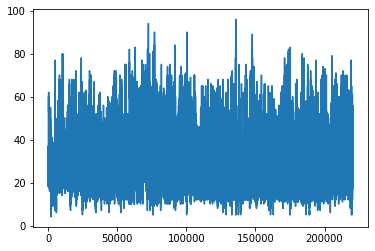

In [ ]:
plt.plot(ag_guess_df['ageG'])

In [ ]:
ag_guess_df.describe()

,uid,photo_id,guess_id,ageG,outG
count,220387.000000,220387.000000,220387.000000,220387.000000,220387.000000
mean,2654.643241,126780.392460,128202.132639,29.490201,-0.050479
std,1338.839321,72395.301415,73473.476653,11.781704,6.995865
min,1.000000,243.000000,1.000000,4.000000,-35.000000
25%,1517.000000,64489.000000,64523.500000,20.000000,-4.000000
50%,2984.000000,125132.000000,127146.000000,27.000000,0.000000
75%,3799.000000,188546.000000,192763.500000,36.000000,4.000000
max,4434.000000,255075.000000,255126.000000,96.000000,35.000000


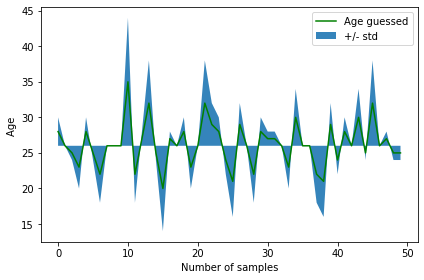

In [ ]:
guess = ag_guess_df['ageG'][:50]
deviation = ag_guess_df['outG'][:50]

plt.plot(guess,'g')
plt.fill_between(range(0,len(guess + 1)),guess - 1 * deviation,guess + 1 * deviation, alpha=0.90)
plt.legend(('Age guessed', '+/- std'))
plt.ylabel('Age ')
plt.xlabel('Number of samples')
plt.tight_layout()
plt.show()

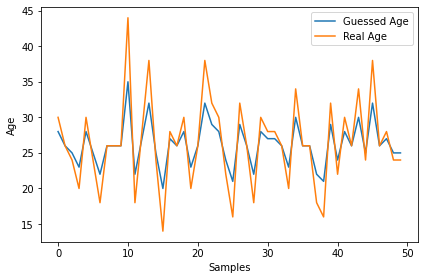

In [ ]:
plt.plot(range(0,len(guess + 1)), guess, label='Guessed Age')
plt.plot(range(0,len(guess + 1)), guess + deviation, label='Real Age')
plt.legend(loc='best')
plt.xlabel('Samples')
plt.ylabel('Age')
plt.tight_layout()
plt.show()

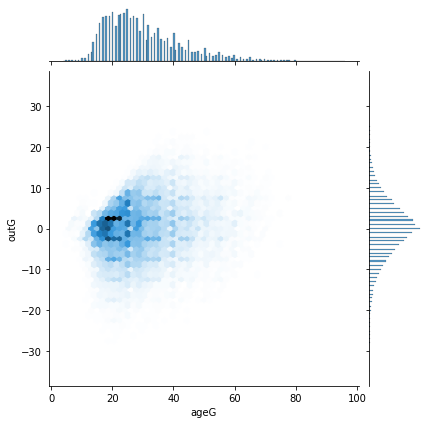

In [ ]:
x = ag_guess_df['ageG']
y = ag_guess_df['outG']

sns.jointplot(x=x, y=y, kind='hex')
plt.show()

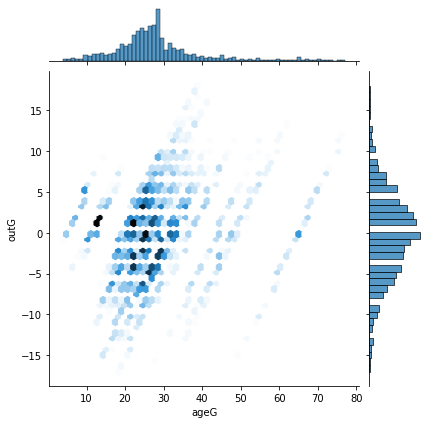

In [ ]:
x = ag_guess_df['ageG'][:5000]
y = ag_guess_df['outG'][:5000]

sns.jointplot(x=x, y=y, kind='hex')
plt.show()

In [ ]:
# making boolean series for a team name 
filter1 = ag_guess_df["ageG"]<40
  
# making boolean series for age 
filter2 = ag_guess_df["ageG"]>10
  
# filtering data on basis of both filters 
ag_guess_df.where(filter1 & filter2, inplace = True) 
ag_guess_df

,uid,photo_id,guess_id,ageG,outG,access
0,6.0,243.0,10.0,28.0,2.0,2012-05-30 03:10:00
1,5.0,243.0,12.0,26.0,0.0,2012-05-30 03:10:00
2,3.0,243.0,37.0,25.0,-1.0,2012-05-30 03:40:00
3,8.0,243.0,50.0,23.0,-3.0,2012-05-30 04:07:00
4,9.0,243.0,67.0,28.0,2.0,2012-05-30 04:23:00
...,...,...,...,...,...,...
220382,4432.0,255075.0,254911.0,24.0,-4.0,2019-03-22 15:35:14
220383,3422.0,255075.0,254990.0,26.0,-2.0,2019-03-23 16:43:57
220384,4376.0,255075.0,255066.0,22.0,-6.0,2019-03-25 05:58:55
220385,4427.0,255075.0,255085.0,21.0,-7.0,2019-03-25 22:30:51


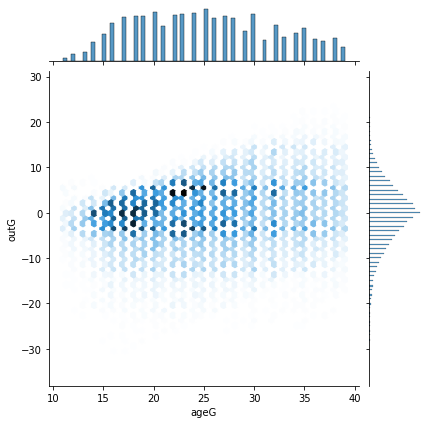

In [ ]:
x = ag_guess_df['ageG']
y = ag_guess_df['outG']

sns.jointplot(x=x, y=y, kind='hex')
plt.show()

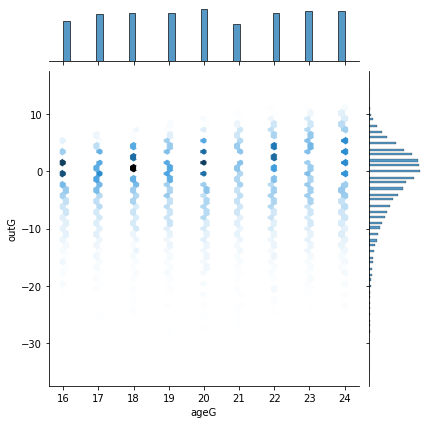

In [ ]:
ag_guess_df = pd.read_csv(r'AgeGuessDataUKDataService I/ag_guess.csv')
# making boolean series for a team name 
filter1 = ag_guess_df["ageG"]<25
  
# making boolean series for age 
filter2 = ag_guess_df["ageG"]>15
  
# filtering data on basis of both filters 
ag_guess_df.where(filter1 & filter2, inplace = True) 
x = ag_guess_df['ageG']
y = ag_guess_df['outG']

sns.jointplot(x=x, y=y, kind='hex')
plt.show()

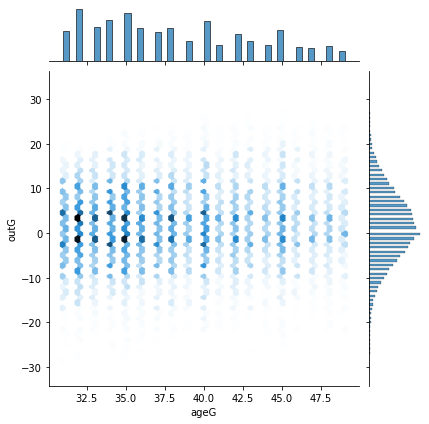

In [ ]:
ag_guess_df = pd.read_csv(r'AgeGuessDataUKDataService I/ag_guess.csv')
# making boolean series for a team name 
filter1 = ag_guess_df["ageG"]<50
  
# making boolean series for age 
filter2 = ag_guess_df["ageG"]>30
  
# filtering data on basis of both filters 
ag_guess_df.where(filter1 & filter2, inplace = True) 
x = ag_guess_df['ageG']
y = ag_guess_df['outG']

sns.jointplot(x=x, y=y, kind='hex')
plt.show()

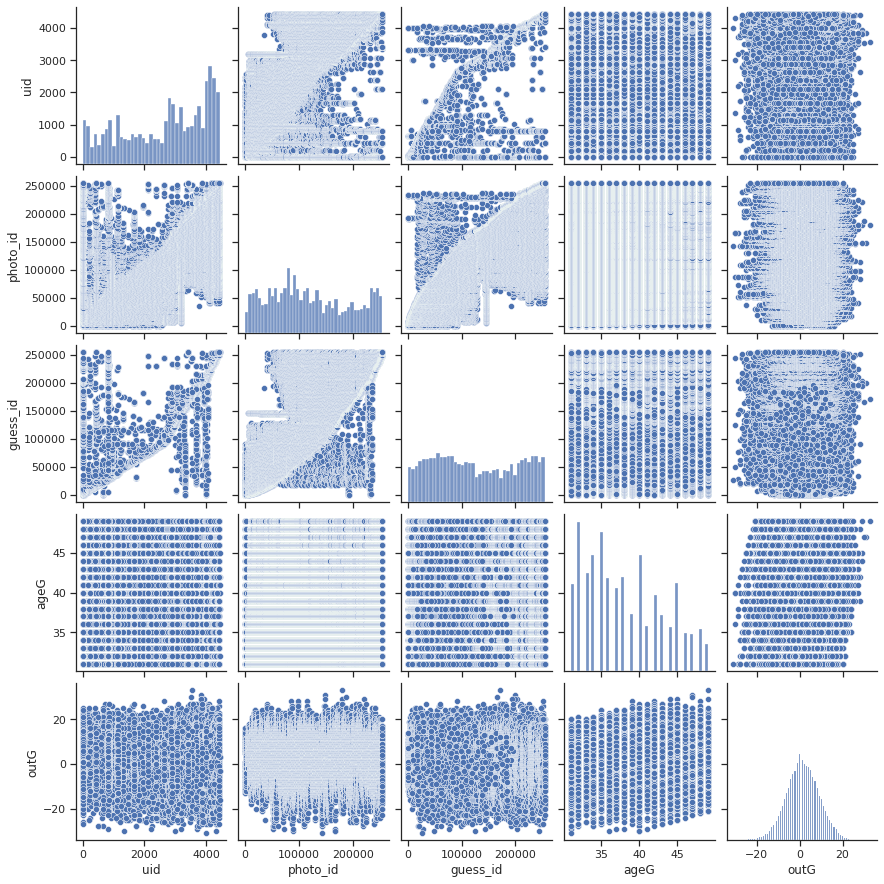

In [ ]:
sns.set_theme(style="ticks")
sns.pairplot(ag_guess_df)

### ag_photos.csv

The ag_photos.csv file stores the information regarding the photographs using the following variables: uid, photo_id, age, relation, gender, ethnicity, birth_country, birth_year, death_age, and created. The uid and photo_id variables represent the individual identifiers the user who uploaded the photograph and of the photograph. The relation variable indicates whether the photograph is of the user or of another person to which the user has a relation (categories: user, unrelated of friend, mother/father, son/daughter, sibling, half sibling, maternal/paternal grandparent, maternal/paternal aunt/uncle, maternal/paternal cousin, grandchild). The gender, ethnicity, birth_country, birth_year, death_age variables contain the respective basic demographic information for the person in the photograph. The created variable stores the timestamp when the photograph was added in date and time UTC +    1:00 in the format ‘YYYY-MM-DD HH:MM:SS

In [ ]:
ag_photos_df = pd.read_csv(r'AgeGuessDataUKDataService I/ag_photos.csv', encoding = "ISO-8859-1")
ag_photos_df.head()

,uid,photo_id,age,relation,gender,ethnicity,birth_country,birth_year,death_age,created
0,4,243,26,User,Male,Caucasian/White,France,NaN,NaN,2012-05-24 00:00:00
1,4,449,49,User,Male,Caucasian/White,France,NaN,NaN,2012-05-24 00:00:00
2,4,556,25,User,Male,Caucasian/White,France,NaN,NaN,2012-05-24 00:00:00
3,4,699,48,User,Male,Caucasian/White,France,NaN,NaN,2012-05-24 00:00:00
4,4,820,35,User,Male,Caucasian/White,France,NaN,NaN,2012-05-24 00:00:00


In [ ]:
ag_photos_df.describe()

,uid,photo_id,age,birth_year,death_age
count,4722.000000,4722.000000,4722.000000,4685.000000,12.000000
mean,2283.240788,143317.900678,29.567768,1983.883458,83.083333
std,1301.076190,67477.436227,12.645282,13.603341,14.342932
min,0.000000,243.000000,3.000000,1877.000000,60.000000
25%,1130.000000,89021.750000,19.000000,1976.000000,74.750000
50%,2399.500000,143213.000000,27.000000,1986.000000,90.500000
75%,3395.750000,200539.250000,37.000000,1994.000000,92.000000
max,4429.000000,255131.000000,106.000000,2014.000000,100.000000


<AxesSubplot:>

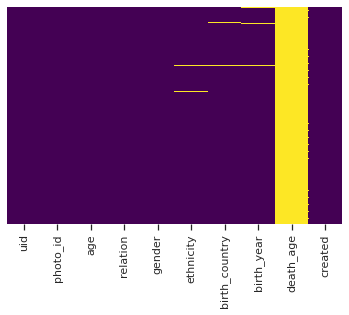

In [ ]:
sns.heatmap(ag_photos_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
ag_photos_df.isnull().sum()

uid                 0
photo_id            0
age                 0
relation            0
gender              0
ethnicity          17
birth_country      24
birth_year         37
death_age        4710
created             0
dtype: int64

In [ ]:
ag_photos_df.shape

(4722, 10)

In [ ]:
ag_photos_df = ag_photos_df.drop('death_age', axis=1)

In [ ]:
ag_photos_df.shape

(4722, 9)

In [ ]:
ag_photos_df = ag_photos_df.dropna()

<AxesSubplot:>

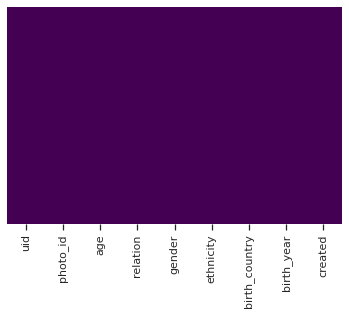

In [ ]:
sns.heatmap(ag_photos_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

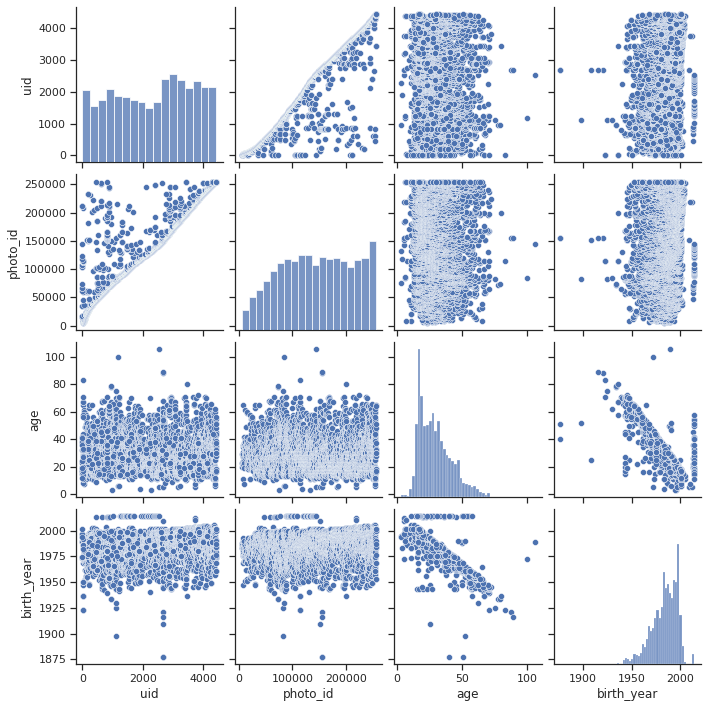

In [ ]:
sns.set_theme(style="ticks")
sns.pairplot(ag_photos_df)

In [ ]:
ag_photos_df['year'] = pd.DatetimeIndex(ag_photos_df['created']).year
ag_photos_df['month'] = pd.DatetimeIndex(ag_photos_df['created']).month

In [ ]:
ag_photos_df.head()

,uid,photo_id,age,relation,gender,ethnicity,birth_country,birth_year,created,year,month
17,22,5204,23,User,Female,Caucasian/White,Croatia,1983.0,2012-06-05 00:00:00,2012,6
23,25,6353,20,User,Female,Caucasian/White,France,1986.0,2012-06-21 00:00:00,2012,6
24,26,6488,23,User,Female,Caucasian/White,Ireland,1988.0,2012-07-12 00:00:00,2012,7
25,22,6665,29,User,Female,Caucasian/White,Croatia,1983.0,2012-07-12 00:00:00,2012,7
26,27,6865,27,User,Female,Caucasian/White,France,1983.0,2012-07-12 00:00:00,2012,7


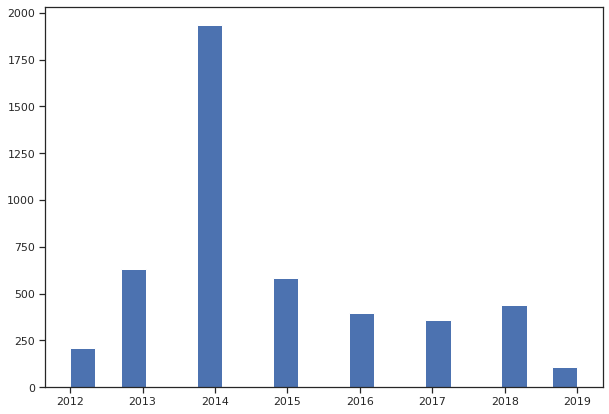

In [ ]:
fig, ax = plt.subplots(figsize =(10, 7)) 
ax.hist(ag_photos_df['year'], bins = 20) 
  
# Show plot 
plt.show() 

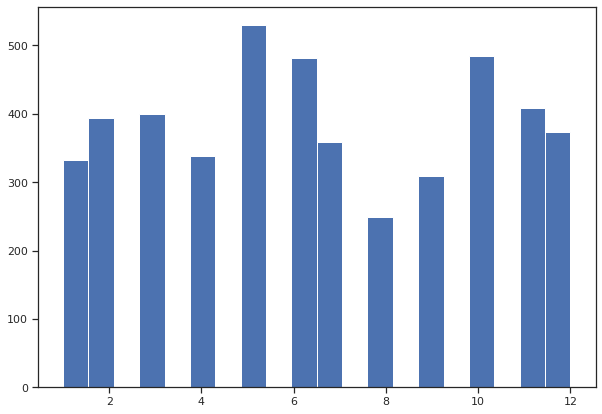

In [ ]:
fig, ax = plt.subplots(figsize =(10, 7)) 
ax.hist(ag_photos_df['month'], bins = 20) 
  
# Show plot 
plt.show() 

In [ ]:
tb = pd.DataFrame()
tb['Freq'] = ag_photos_df['year'].value_counts(sort=False)
tb

,Freq
2012,210
2016,395
2013,630
2017,359
2014,1935
2018,439
2015,583
2019,108


In [ ]:
tb = tb.reset_index()
tb.head()

,index,Freq
0,2012,210
1,2016,395
2,2013,630
3,2017,359
4,2014,1935


In [ ]:
x = tb['index']
y = tb['Freq'].cumsum()

Text(0, 0.5, 'Cumulative number of uploaded photos')

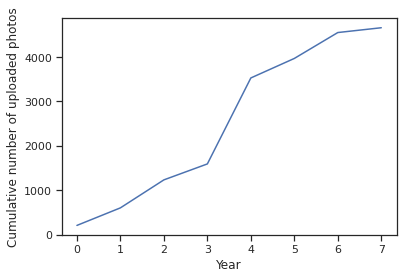

In [ ]:
plt.plot(y)
plt.xlabel('Year')
plt.ylabel('Cumulative number of uploaded photos')

In [ ]:
tb = pd.DataFrame()
tb['Freq'] = ag_photos_df['birth_country'].value_counts(sort=False)
tb = tb.sort_values(by='Freq', ascending=False)
tb

,Freq
United States,1999
United Kingdom,437
Denmark,390
France,183
Canada,179
...,...
Liberia,1
Panamá,1
Macedonia,1
VE,1


In [ ]:
tb = tb.reset_index()
x = tb['index'][:10]
y = tb['Freq'][:10]

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0, 'United States'),
 Text(1, 0, 'United Kingdom'),
 Text(2, 0, 'Denmark'),
 Text(3, 0, 'France'),
 Text(4, 0, 'Canada'),
 Text(5, 0, 'Mexico'),
 Text(6, 0, 'Sweden'),
 Text(7, 0, 'Germany'),
 Text(8, 0, 'Italy'),
 Text(9, 0, 'Brazil')]

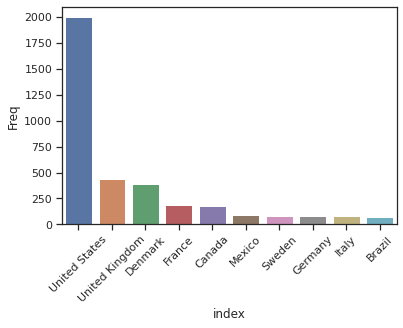

In [ ]:
g = sns.barplot(x, y)
g.set_xticklabels(rotation=45, labels=x)

In [ ]:
tb = pd.DataFrame()
tb['Freq'] = ag_photos_df['ethnicity'].value_counts(sort=False)
tb = tb.sort_values(by='Freq', ascending=False)
tb

,Freq
Caucasian/White,3720
Asian,340
Hispanic,252
Other,245
Black,102


In [ ]:
tb = tb.reset_index()
x = tb['index']
y = tb['Freq']

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0, 'Caucasian/White'),
 Text(1, 0, 'Asian'),
 Text(2, 0, 'Hispanic'),
 Text(3, 0, 'Other'),
 Text(4, 0, 'Black')]

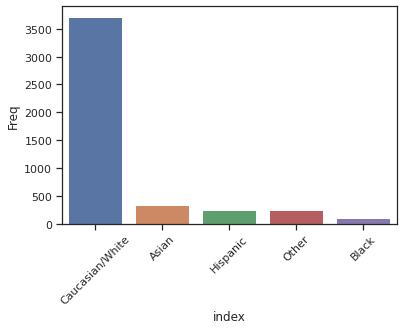

In [ ]:
g = sns.barplot(x, y)
g.set_xticklabels(rotation=45, labels=x)

In [ ]:
tb = pd.DataFrame()
tb['Freq'] = ag_photos_df['gender'].value_counts(sort=False)
tb = tb.sort_values(by='Freq', ascending=False)
tb

,Freq
Female,2835
Male,1824


In [ ]:
tb = tb.reset_index()
x = tb['index']
y = tb['Freq']

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0, 'Female'), Text(1, 0, 'Male')]

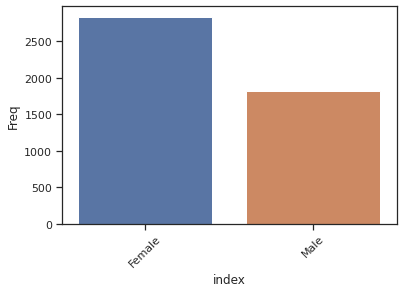

In [ ]:
g = sns.barplot(x, y)
g.set_xticklabels(rotation=45, labels=x)

In [ ]:
ag_photos_df.head()

,uid,photo_id,age,relation,gender,ethnicity,birth_country,birth_year,created,year,month
17,22,5204,23,User,Female,Caucasian/White,Croatia,1983.0,2012-06-05 00:00:00,2012,6
23,25,6353,20,User,Female,Caucasian/White,France,1986.0,2012-06-21 00:00:00,2012,6
24,26,6488,23,User,Female,Caucasian/White,Ireland,1988.0,2012-07-12 00:00:00,2012,7
25,22,6665,29,User,Female,Caucasian/White,Croatia,1983.0,2012-07-12 00:00:00,2012,7
26,27,6865,27,User,Female,Caucasian/White,France,1983.0,2012-07-12 00:00:00,2012,7


In [ ]:
ag_guess_df = pd.read_csv(r'AgeGuessDataUKDataService I/ag_guess.csv')
ag_guess_df.head()

,uid,photo_id,guess_id,ageG,outG,access
0,6,243,10,28,2,2012-05-30 03:10:00
1,5,243,12,26,0,2012-05-30 03:10:00
2,3,243,37,25,-1,2012-05-30 03:40:00
3,8,243,50,23,-3,2012-05-30 04:07:00
4,9,243,67,28,2,2012-05-30 04:23:00


In [ ]:
ag_guess_photos_df = pd.merge(ag_guess_df, ag_photos_df, on='photo_id', how='inner')

In [ ]:
ag_guess_photos_df.head()

,uid_x,photo_id,guess_id,ageG,outG,access,uid_y,age,relation,gender,ethnicity,birth_country,birth_year,created,year,month
0,8,5204,507,24,1,2012-06-05 10:19:00,22,23,User,Female,Caucasian/White,Croatia,1983.0,2012-06-05 00:00:00,2012,6
1,23,5204,516,20,-3,2012-06-06 06:41:00,22,23,User,Female,Caucasian/White,Croatia,1983.0,2012-06-05 00:00:00,2012,6
2,13,5204,524,20,-3,2012-06-10 04:54:00,22,23,User,Female,Caucasian/White,Croatia,1983.0,2012-06-05 00:00:00,2012,6
3,14,5204,538,19,-4,2012-06-10 01:46:00,22,23,User,Female,Caucasian/White,Croatia,1983.0,2012-06-05 00:00:00,2012,6
4,24,5204,543,25,2,2012-06-12 01:46:00,22,23,User,Female,Caucasian/White,Croatia,1983.0,2012-06-05 00:00:00,2012,6


<AxesSubplot:xlabel='gender', ylabel='ageG'>

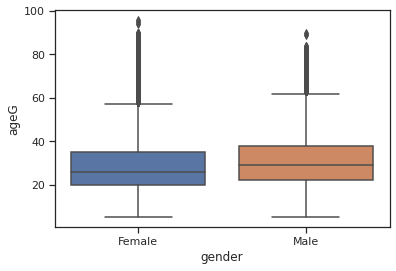

In [ ]:
sns.boxplot(x=ag_guess_photos_df['gender'], y=ag_guess_photos_df['ageG'])

<AxesSubplot:xlabel='gender', ylabel='outG'>

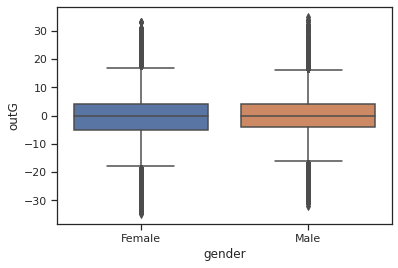

In [ ]:
sns.boxplot(x=ag_guess_photos_df['gender'], y=ag_guess_photos_df['outG'])

<AxesSubplot:xlabel='ethnicity', ylabel='age'>

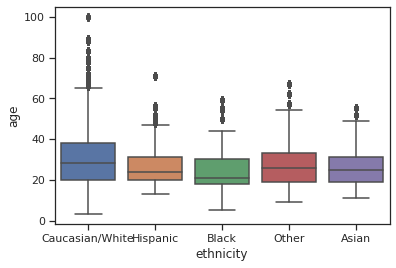

In [ ]:
sns.boxplot(x=ag_guess_photos_df['ethnicity'], y=ag_guess_photos_df['age'])

<AxesSubplot:xlabel='ethnicity', ylabel='outG'>

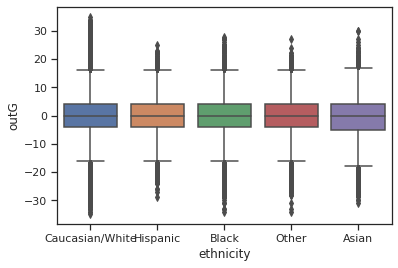

In [ ]:
sns.boxplot(x=ag_guess_photos_df['ethnicity'], y=ag_guess_photos_df['outG'])

Te ag_gamers.csv fle stores the information regarding the users (aka gamers) with the following variables:
uid, g, ng, points, gender, ethnicity, birth_country, birth_year, access, and created. Tese variables store the individual identifer of the user (uid), the number of correct guesses the user made (g), the number of other guesses (ng),
and the points gained in the online game (points). Furthermore, the fle contains the users’ basic demographic
information regarding gender, ethnicity, birth country, and birth year, stored in variables of these names. Finally,
the access and created variables store the timestamp in date and time UTC+1:00 of when the user last logged in
and of when the user created an account with AgeGuess, respectively

In [ ]:
ag_gamers_df = pd.read_csv(r'AgeGuessDataUKDataService I/ag_gamers.csv', encoding = "ISO-8859-1")
ag_gamers_df.head()

,uid,g,ng,points,gender,ethnicity,birth_country,birth_year,created,access
0,1,212,2906,13523,Female,Caucasian/White,France,1991.0,2014-08-02 16:04:53,2019-03-22 17:40:08
1,2,25,206,1353,Male,Caucasian/White,Germany,1973.0,2013-07-24 13:57:51,2014-10-13 17:35:05
2,3,143,1892,9999,Male,Caucasian/White,Serbia,1974.0,2013-07-24 13:57:51,2016-10-26 15:49:07
3,4,0,0,210,Male,Caucasian/White,France,NaN,2013-07-24 13:57:51,2013-10-16 21:47:10
4,5,3,10,91,NaN,NaN,NaN,NaN,2013-07-24 13:57:51,2013-10-14 10:17:39


In [ ]:
ag_gamers_df.describe()

,uid,g,ng,points,birth_year
count,4437.000000,4437.000000,4437.000000,4437.000000,3910.000000
mean,2219.000000,4.322290,53.178724,280.851927,1984.551407
std,1280.995902,11.440806,155.760470,752.894284,13.753124
min,1.000000,0.000000,0.000000,0.000000,1892.000000
25%,1110.000000,0.000000,4.000000,26.000000,1977.000000
50%,2219.000000,1.000000,19.000000,104.000000,1987.000000
75%,3328.000000,4.000000,50.000000,273.000000,1995.000000
max,4437.000000,242.000000,3511.000000,15897.000000,2014.000000


<AxesSubplot:>

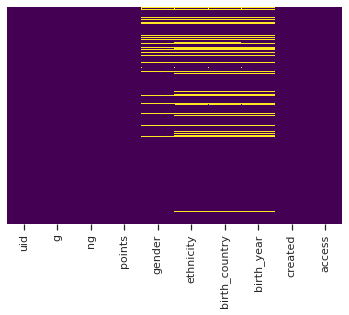

In [ ]:
sns.heatmap(ag_gamers_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
ag_gamers_df.isnull().sum()

uid                0
g                  0
ng                 0
points             0
gender           338
ethnicity        520
birth_country    523
birth_year       527
created            0
access             0
dtype: int64

In [ ]:
ag_gamers_df.shape

(4437, 10)

In [ ]:
ag_gamers_df = ag_gamers_df.dropna()

<AxesSubplot:>

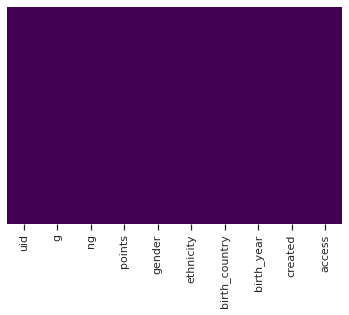

In [ ]:
sns.heatmap(ag_gamers_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

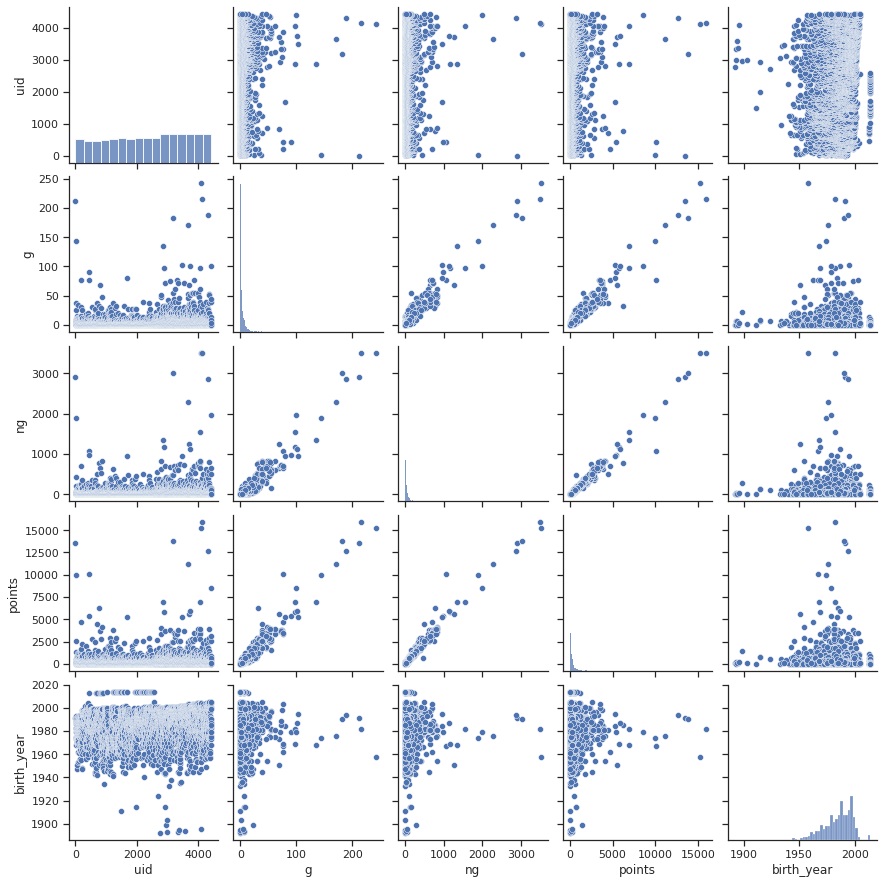

In [ ]:
sns.set_theme(style="ticks")
sns.pairplot(ag_gamers_df)

In [ ]:
ag_gamers_df.head()

,uid,g,ng,points,gender,ethnicity,birth_country,birth_year,created,access
0,1,212,2906,13523,Female,Caucasian/White,France,1991.0,2014-08-02 16:04:53,2019-03-22 17:40:08
1,2,25,206,1353,Male,Caucasian/White,Germany,1973.0,2013-07-24 13:57:51,2014-10-13 17:35:05
2,3,143,1892,9999,Male,Caucasian/White,Serbia,1974.0,2013-07-24 13:57:51,2016-10-26 15:49:07
10,11,4,55,285,Male,Caucasian/White,France,1979.0,2013-07-24 13:57:51,2013-10-20 22:22:42
14,15,3,53,334,Female,Caucasian/White,Germany,1993.0,2013-07-24 13:57:51,2013-10-20 21:27:58


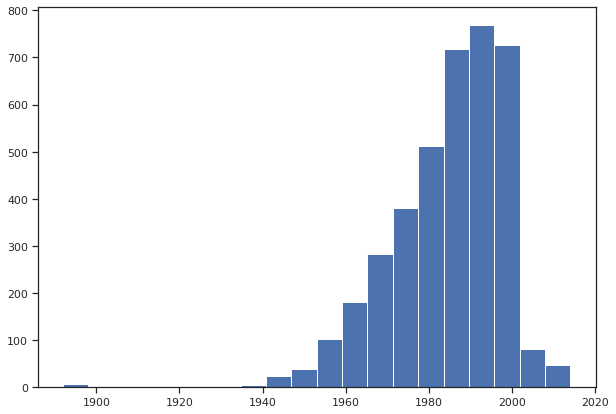

In [ ]:
fig, ax = plt.subplots(figsize =(10, 7)) 
ax.hist(ag_gamers_df['birth_year'], bins = 20) 
  
# Show plot 
plt.show() 

In [ ]:
tb = pd.DataFrame()
tb['Freq'] = ag_gamers_df['birth_country'].value_counts(sort=False)
tb = tb.sort_values(by='Freq', ascending=False)
tb

,Freq
United States,1648
United Kingdom,345
Denmark,310
Canada,144
France,127
...,...
Panama,1
Uzbekistan,1
Luxembourg,1
slow,1


In [ ]:
tb = tb.reset_index()
x = tb['index'][:10]
y = tb['Freq'][:10]

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0, 'United States'),
 Text(1, 0, 'United Kingdom'),
 Text(2, 0, 'Denmark'),
 Text(3, 0, 'Canada'),
 Text(4, 0, 'France'),
 Text(5, 0, 'Mexico'),
 Text(6, 0, 'Italy'),
 Text(7, 0, 'Russia'),
 Text(8, 0, 'Netherlands'),
 Text(9, 0, 'Germany')]

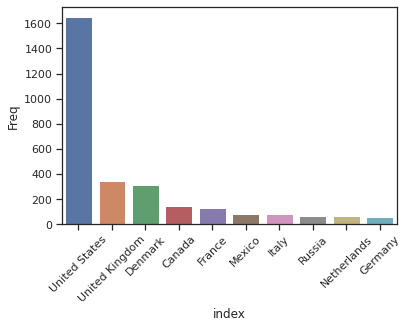

In [ ]:
g = sns.barplot(x, y)
g.set_xticklabels(rotation=45, labels=x)

In [ ]:
tb = pd.DataFrame()
tb['Freq'] = ag_gamers_df['ethnicity'].value_counts(sort=False)
tb = tb.sort_values(by='Freq', ascending=False)
tb

,Freq
Caucasian/White,2997
Asian,296
Hispanic,261
Other,208
Black,118


In [ ]:
tb = tb.reset_index()
x = tb['index']
y = tb['Freq']

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0, 'Caucasian/White'),
 Text(1, 0, 'Asian'),
 Text(2, 0, 'Hispanic'),
 Text(3, 0, 'Other'),
 Text(4, 0, 'Black')]

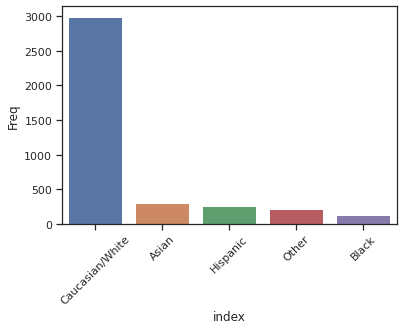

In [ ]:
g = sns.barplot(x, y)
g.set_xticklabels(rotation=45, labels=x)

In [ ]:
tb = pd.DataFrame()
tb['Freq'] = ag_gamers_df['gender'].value_counts(sort=False)
tb = tb.sort_values(by='Freq', ascending=False)
tb

,Freq
Female,2314
Male,1566


In [ ]:
tb = tb.reset_index()
x = tb['index']
y = tb['Freq']

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0, 'Female'), Text(1, 0, 'Male')]

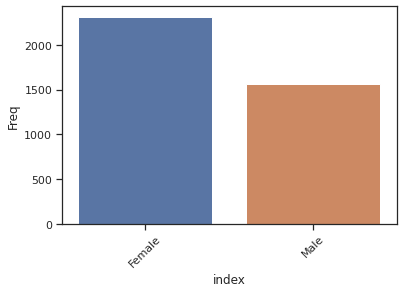

In [ ]:
g = sns.barplot(x, y)
g.set_xticklabels(rotation=45, labels=x)

In [ ]:
ag_gamers_df.head()

,uid,g,ng,points,gender,ethnicity,birth_country,birth_year,created,access
0,1,212,2906,13523,Female,Caucasian/White,France,1991.0,2014-08-02 16:04:53,2019-03-22 17:40:08
1,2,25,206,1353,Male,Caucasian/White,Germany,1973.0,2013-07-24 13:57:51,2014-10-13 17:35:05
2,3,143,1892,9999,Male,Caucasian/White,Serbia,1974.0,2013-07-24 13:57:51,2016-10-26 15:49:07
10,11,4,55,285,Male,Caucasian/White,France,1979.0,2013-07-24 13:57:51,2013-10-20 22:22:42
14,15,3,53,334,Female,Caucasian/White,Germany,1993.0,2013-07-24 13:57:51,2013-10-20 21:27:58


<AxesSubplot:xlabel='gender', ylabel='points'>

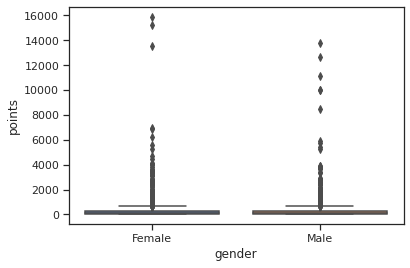

In [ ]:
sns.boxplot(x=ag_gamers_df['gender'], y=ag_gamers_df['points'])

In [ ]:
tb1 = ag_gamers_df.groupby(["birth_country", "gender"])["points"].count()
tb1.head(20)

birth_country  gender
'Straya        Male       1
Alamo          Female     1
Albania        Male       1
Angola         Male       1
Argentina      Female    18
               Male      28
Armenia        Male       1
Australia      Female    21
               Male      13
Austria        Female    10
               Male       3
Azerbaidijan   Female     2
Bangladesh     Female     2
               Male       2
Belarus        Female     3
               Male       2
Belgium        Female    27
               Male      26
Belize         Female     2
               Male       1
Name: points, dtype: int64

In [ ]:
tb2 = ag_gamers_df.groupby(["birth_country", "gender"])["points"].median()
tb2.head(20)

birth_country  gender
'Straya        Male       12.0
Alamo          Female     30.0
Albania        Male       20.0
Angola         Male      557.0
Argentina      Female    161.0
               Male       47.5
Armenia        Male      139.0
Australia      Female    143.0
               Male      175.0
Austria        Female    337.5
               Male      897.0
Azerbaidijan   Female    335.0
Bangladesh     Female    135.0
               Male       24.0
Belarus        Female    696.0
               Male       90.0
Belgium        Female    146.0
               Male      155.5
Belize         Female    744.5
               Male       13.0
Name: points, dtype: float64

In [ ]:
tb3 = pd.merge(tb1, tb2, on=["birth_country", "gender"], how='inner')

In [ ]:
tb3

,,points_x,points_y
birth_country,gender,,
'Straya,Male,1,12.0
Alamo,Female,1,30.0
Albania,Male,1,20.0
Angola,Male,1,557.0
Argentina,Female,18,161.0
...,...,...,...
Vietnam,Male,3,119.0
Your Mom,Male,1,29.0
Zimbabwe,Male,2,108.0


In [ ]:
tb3.rename(columns = {"points_x": "count"}, inplace=True)
tb3.rename(columns = {"points_y": "median"}, inplace=True)
tb3

,,count,median
birth_country,gender,,
'Straya,Male,1,12.0
Alamo,Female,1,30.0
Albania,Male,1,20.0
Angola,Male,1,557.0
Argentina,Female,18,161.0
...,...,...,...
Vietnam,Male,3,119.0
Your Mom,Male,1,29.0
Zimbabwe,Male,2,108.0


In [ ]:
tb3 = tb3.sort_values(by='count', ascending=False)
tb3

count  median
birth_country  gender               
United States  Female   1074   117.0
               Male      574   111.0
United Kingdom Female    195   104.0
Denmark        Female    180   135.0
United Kingdom Male      150   134.0
...                      ...     ...
Liberia        Female      1   227.0
Alamo          Female      1    30.0
Kenya          Male        1   320.0
Jordan         Female      1   397.0
united         Female      1    86.0

[199 rows x 2 columns]

In [ ]:
tb4 = tb3.where(tb3['count'] > 20)
tb4 = tb4.sort_values(by='median', ascending=False)
tb4 = tb4.dropna()
tb4

,,count,median
birth_country,gender,,
Germany,Male,27.0,278.0
Russia,Female,40.0,262.0
Sweden,Female,28.0,244.5
Russia,Male,26.0,184.0
France,Female,69.0,174.0
Sweden,Male,26.0,164.5
Italy,Female,33.0,161.0
Denmark,Male,130.0,161.0
Spain,Male,21.0,156.0


In [ ]:
tb4 = tb4.reset_index()
x = ['_'.join(i) for i in zip(tb4["birth_country"].map(str),tb4["gender"])][:20]
y = tb4['median'][:20]

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0, 'Germany_Male'),
 Text(1, 0, 'Russia_Female'),
 Text(2, 0, 'Sweden_Female'),
 Text(3, 0, 'Russia_Male'),
 Text(4, 0, 'France_Female'),
 Text(5, 0, 'Sweden_Male'),
 Text(6, 0, 'Italy_Female'),
 Text(7, 0, 'Denmark_Male'),
 Text(8, 0, 'Spain_Male'),
 Text(9, 0, 'Belgium_Male'),
 Text(10, 0, 'Belgium_Female'),
 Text(11, 0, 'Italy_Male'),
 Text(12, 0, 'Australia_Female'),
 Text(13, 0, 'Germany_Female'),
 Text(14, 0, 'Netherlands_Female'),
 Text(15, 0, 'Denmark_Female'),
 Text(16, 0, 'United Kingdom_Male'),
 Text(17, 0, 'Canada_Female'),
 Text(18, 0, 'Netherlands_Male'),
 Text(19, 0, 'Canada_Male')]

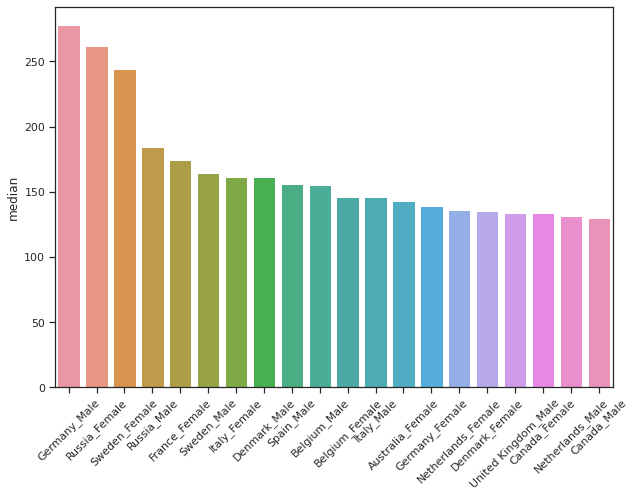

In [ ]:
fig, ax = plt.subplots(figsize =(10, 7)) 
g = sns.barplot(x, y)
g.set_xticklabels(rotation=45, labels=x)


<AxesSubplot:xlabel='ethnicity', ylabel='points'>

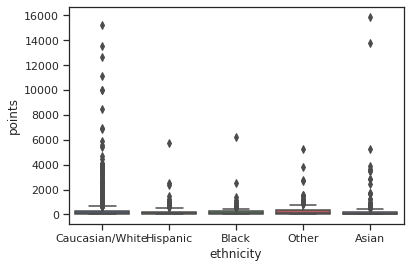

In [ ]:
sns.boxplot(x=ag_gamers_df['ethnicity'], y=ag_gamers_df['points'])

<AxesSubplot:xlabel='ethnicity', ylabel='g'>

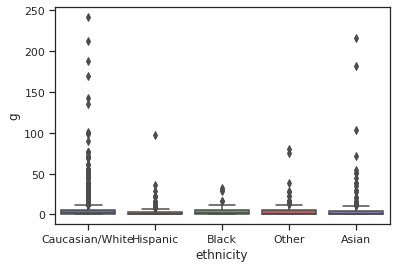

In [ ]:
sns.boxplot(x=ag_gamers_df['ethnicity'], y=ag_gamers_df['g'])

<AxesSubplot:xlabel='ethnicity', ylabel='ng'>

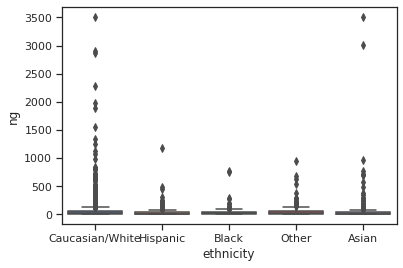

In [ ]:
sns.boxplot(x=ag_gamers_df['ethnicity'], y=ag_gamers_df['ng'])

In [ ]:
tb4.head(5)

,birth_country,gender,count,median
0,Germany,Male,27.0,278.0
1,Russia,Female,40.0,262.0
2,Sweden,Female,28.0,244.5
3,Russia,Male,26.0,184.0
4,France,Female,69.0,174.0


In [ ]:
ag_gamers_df.head()

,uid,g,ng,points,gender,ethnicity,birth_country,birth_year,created,access
0,1,212,2906,13523,Female,Caucasian/White,France,1991.0,2014-08-02 16:04:53,2019-03-22 17:40:08
1,2,25,206,1353,Male,Caucasian/White,Germany,1973.0,2013-07-24 13:57:51,2014-10-13 17:35:05
2,3,143,1892,9999,Male,Caucasian/White,Serbia,1974.0,2013-07-24 13:57:51,2016-10-26 15:49:07
10,11,4,55,285,Male,Caucasian/White,France,1979.0,2013-07-24 13:57:51,2013-10-20 22:22:42
14,15,3,53,334,Female,Caucasian/White,Germany,1993.0,2013-07-24 13:57:51,2013-10-20 21:27:58


In [ ]:
ag_guess_df.head()

,uid,photo_id,guess_id,ageG,outG,access
0,6,243,10,28,2,2012-05-30 03:10:00
1,5,243,12,26,0,2012-05-30 03:10:00
2,3,243,37,25,-1,2012-05-30 03:40:00
3,8,243,50,23,-3,2012-05-30 04:07:00
4,9,243,67,28,2,2012-05-30 04:23:00


In [ ]:
ag_photos_df.head()

,uid,photo_id,age,relation,gender,ethnicity,birth_country,birth_year,created,year,month
17,22,5204,23,User,Female,Caucasian/White,Croatia,1983.0,2012-06-05 00:00:00,2012,6
23,25,6353,20,User,Female,Caucasian/White,France,1986.0,2012-06-21 00:00:00,2012,6
24,26,6488,23,User,Female,Caucasian/White,Ireland,1988.0,2012-07-12 00:00:00,2012,7
25,22,6665,29,User,Female,Caucasian/White,Croatia,1983.0,2012-07-12 00:00:00,2012,7
26,27,6865,27,User,Female,Caucasian/White,France,1983.0,2012-07-12 00:00:00,2012,7


In [ ]:
ag_guess_photos_df.head()

,uid_x,photo_id,guess_id,ageG,outG,access,uid_y,age,relation,gender,ethnicity,birth_country,birth_year,created,year,month
0,8,5204,507,24,1,2012-06-05 10:19:00,22,23,User,Female,Caucasian/White,Croatia,1983.0,2012-06-05 00:00:00,2012,6
1,23,5204,516,20,-3,2012-06-06 06:41:00,22,23,User,Female,Caucasian/White,Croatia,1983.0,2012-06-05 00:00:00,2012,6
2,13,5204,524,20,-3,2012-06-10 04:54:00,22,23,User,Female,Caucasian/White,Croatia,1983.0,2012-06-05 00:00:00,2012,6
3,14,5204,538,19,-4,2012-06-10 01:46:00,22,23,User,Female,Caucasian/White,Croatia,1983.0,2012-06-05 00:00:00,2012,6
4,24,5204,543,25,2,2012-06-12 01:46:00,22,23,User,Female,Caucasian/White,Croatia,1983.0,2012-06-05 00:00:00,2012,6


In [ ]:
tb5 = ag_guess_photos_df.groupby(["ethnicity", "gender"])["outG"].median()
tb5.head(20)

ethnicity        gender
Asian            Female   -1.0
                 Male      0.0
Black            Female   -0.5
                 Male      2.0
Caucasian/White  Female    0.0
                 Male      0.0
Hispanic         Female    0.0
                 Male      0.0
Other            Female    0.0
                 Male      0.0
Name: outG, dtype: float64

In [ ]:
ag_guess_photos_df = ag_guess_photos_df.rename(columns={"uid_x":"uid"})

In [ ]:
ag_guess_photos_gamer_df = pd.merge(ag_guess_photos_df, ag_gamers_df, on='uid', how='inner').drop(['uid_y', 'relation', 'created_x', 'access_x', 'access_y', 'created_y'], axis=1)
ag_guess_photos_gamer_df = ag_guess_photos_gamer_df.rename(columns={"gender_x":"gender_gamer"})
ag_guess_photos_gamer_df = ag_guess_photos_gamer_df.rename(columns={"ethnicity_x":"ethnicity_gamer"})
ag_guess_photos_gamer_df = ag_guess_photos_gamer_df.rename(columns={"birth_year_x":"birth_year_gamer"})
ag_guess_photos_gamer_df = ag_guess_photos_gamer_df.rename(columns={"birth_country_x":"birth_country_gamer"})
ag_guess_photos_gamer_df = ag_guess_photos_gamer_df.rename(columns={"birth_country_y":"birth_country_photo"})
ag_guess_photos_gamer_df = ag_guess_photos_gamer_df.rename(columns={"gender_y":"gender_photo"})
ag_guess_photos_gamer_df = ag_guess_photos_gamer_df.rename(columns={"ethnicity_y":"ethnicity_photo"})
ag_guess_photos_gamer_df = ag_guess_photos_gamer_df.rename(columns={"birth_year_y":"birth_year_photo"})
ag_guess_photos_gamer_df.head()

,uid,photo_id,guess_id,ageG,outG,age,gender_gamer,ethnicity_gamer,birth_country_gamer,birth_year_gamer,year,month,g,ng,points,gender_photo,ethnicity_photo,birth_country_photo,birth_year_photo
0,29,5204,703,17,-6,23,Female,Caucasian/White,Croatia,1983.0,2012,6,6,45,181,Male,Caucasian/White,Switzerland,1968.0
1,29,6353,715,24,4,20,Female,Caucasian/White,France,1986.0,2012,6,6,45,181,Male,Caucasian/White,Switzerland,1968.0
2,29,6488,691,33,10,23,Female,Caucasian/White,Ireland,1988.0,2012,7,6,45,181,Male,Caucasian/White,Switzerland,1968.0
3,29,6665,713,24,-5,29,Female,Caucasian/White,Croatia,1983.0,2012,7,6,45,181,Male,Caucasian/White,Switzerland,1968.0
4,29,6865,712,29,2,27,Female,Caucasian/White,France,1983.0,2012,7,6,45,181,Male,Caucasian/White,Switzerland,1968.0


In [ ]:
tb6 = ag_guess_photos_gamer_df.groupby(["gender_gamer", "gender_photo"])["outG"].mean()
tb6.head()

gender_gamer  gender_photo
Female        Female         -0.241993
              Male           -0.375208
Male          Female          0.370435
              Male            0.001581
Name: outG, dtype: float64

In [ ]:
tb7 = ag_guess_photos_gamer_df.groupby(["ethnicity_gamer", "ethnicity_photo"])["outG"].mean()
tb7.head(30)

ethnicity_gamer  ethnicity_photo
Asian            Asian             -0.623755
                 Black              0.139726
                 Caucasian/White   -1.069266
                 Hispanic          -0.825077
                 Other             -0.986595
Black            Asian             -0.293454
                 Black              0.796992
                 Caucasian/White   -0.274683
                 Hispanic          -0.559809
                 Other             -0.112500
Caucasian/White  Asian              0.447711
                 Black              1.353834
                 Caucasian/White   -0.100830
                 Hispanic           0.122274
                 Other              0.139713
Hispanic         Asian              0.420237
                 Black              1.768240
                 Caucasian/White   -0.237955
                 Hispanic          -0.216738
                 Other             -0.113269
Other            Asian              0.205331
                 Black

In [ ]:
tb8 = ag_guess_photos_gamer_df.groupby(["ethnicity_photo"])["outG"].mean()
tb8.head(30)

ethnicity_photo
Asian              0.336187
Black              1.249269
Caucasian/White   -0.200195
Hispanic          -0.020996
Other              0.037373
Name: outG, dtype: float64

In [ ]:
tb8 = ag_guess_photos_gamer_df.groupby(["ethnicity_gamer"])["outG"].mean()
tb8.head(30)

ethnicity_gamer
Asian             -0.980654
Black             -0.248981
Caucasian/White    0.005432
Hispanic          -0.117447
Other             -0.371699
Name: outG, dtype: float64

<AxesSubplot:xlabel='ethnicity_photo', ylabel='outG'>

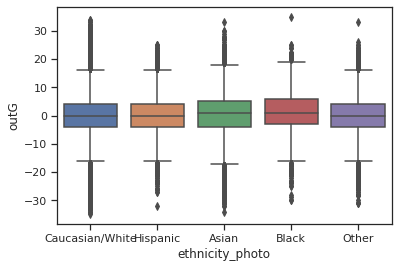

In [ ]:
sns.boxplot(x=ag_guess_photos_gamer_df['ethnicity_photo'], y=ag_guess_photos_gamer_df['outG'])

<AxesSubplot:xlabel='ethnicity_gamer', ylabel='outG'>

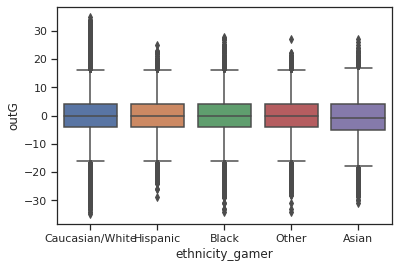

In [ ]:
sns.boxplot(x=ag_guess_photos_gamer_df['ethnicity_gamer'], y=ag_guess_photos_gamer_df['outG'])